In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
hour=pd.read_csv('cleaned_hour.csv')
day=pd.read_csv('day.csv')

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
hour = hour.drop(['instant','dteday','yr','casual', 'registered'], axis=1)
day = day.drop(['instant','dteday','yr','casual', 'registered'], axis=1)


In [6]:
day.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
hour.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17135 entries, 0 to 17134
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17135 non-null  int64  
 1   mnth        17135 non-null  int64  
 2   hr          17135 non-null  int64  
 3   holiday     17135 non-null  int64  
 4   weekday     17135 non-null  int64  
 5   workingday  17135 non-null  int64  
 6   weathersit  17135 non-null  int64  
 7   temp        17135 non-null  float64
 8   atemp       17135 non-null  float64
 9   hum         17135 non-null  float64
 10  windspeed   17135 non-null  float64
 11  cnt         17135 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [10]:
hour.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,2.494718,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,180.490516
std,1.109381,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,166.101082
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,39.000000
50%,2.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,139.000000
75%,3.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,273.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,733.000000


In [11]:
day.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
hour.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [13]:
day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [14]:
hour.duplicated().sum()

np.int64(2)

In [15]:
hour = hour.drop_duplicates()

In [16]:
hour.duplicated().sum()

np.int64(0)

In [17]:
day.duplicated().sum()

np.int64(0)

In [18]:
day.shape

(730, 11)

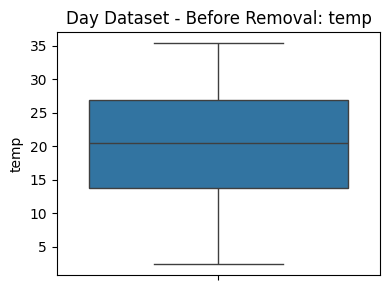

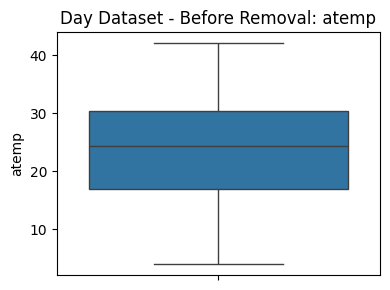

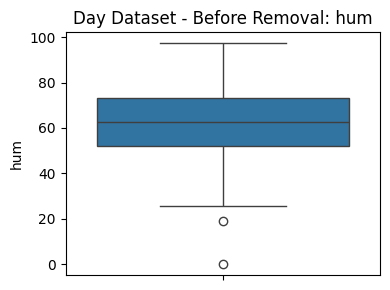

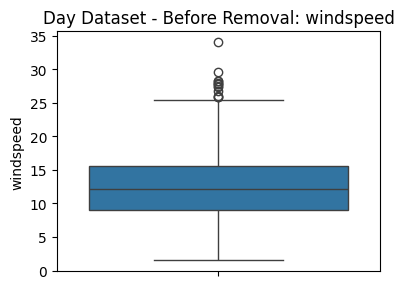

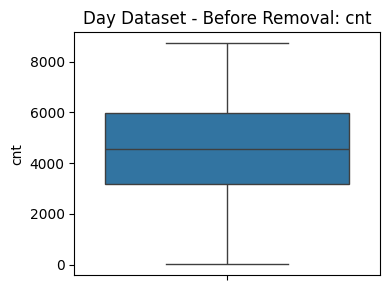

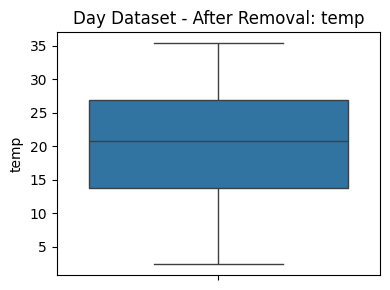

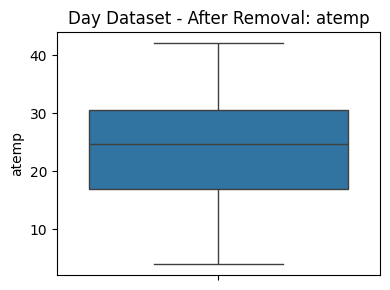

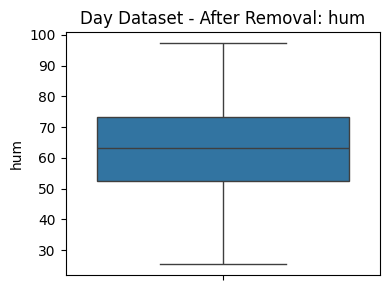

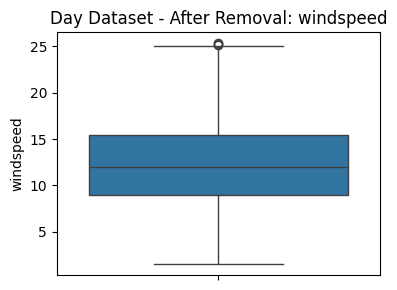

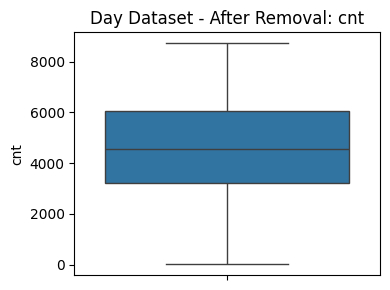

In [39]:
numeric_cols = ['temp','atemp','hum','windspeed','cnt']
numeric_day = [c for c in numeric_cols if c in day.columns]
def remove_outliers_day(day, cols):
    day_clean = day.copy()
    for col in cols:
        Q1 = day_clean[col].quantile(0.25)
        Q3 = day_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        day_clean = day_clean[(day_clean[col] >= lower) & (day_clean[col] <= upper)]
    return day_clean
day_clean = remove_outliers_day(day, numeric_day)
for col in numeric_day:
    plt.figure(figsize=(4,3))
    sns.boxplot(y=day[col])
    plt.title(f"Day Dataset - Before Removal: {col}")
    plt.tight_layout()
    plt.show()
for col in numeric_day:
    plt.figure(figsize=(4,3))
    sns.boxplot(y=day_clean[col])
    plt.title(f"Day Dataset - After Removal: {col}")
    plt.tight_layout()
    plt.show()


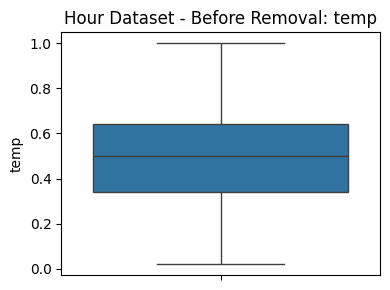

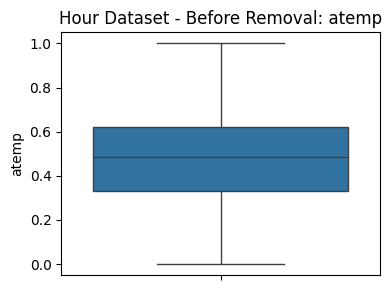

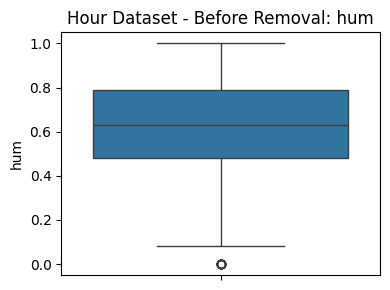

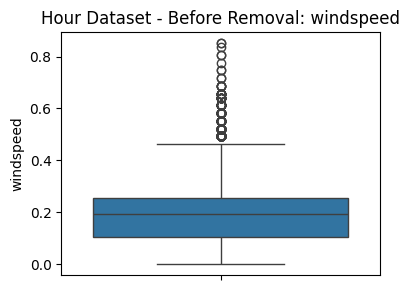

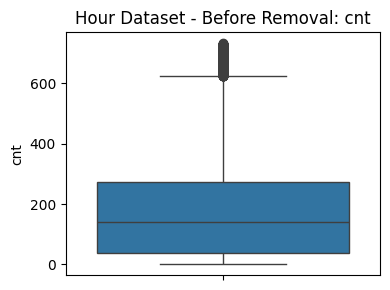

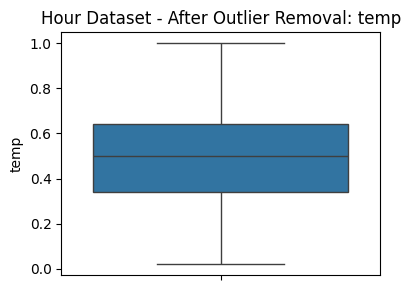

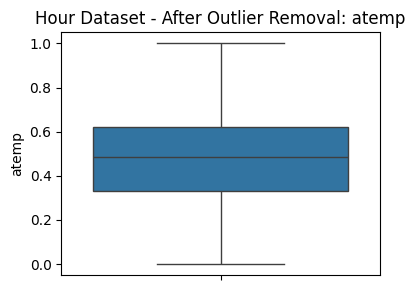

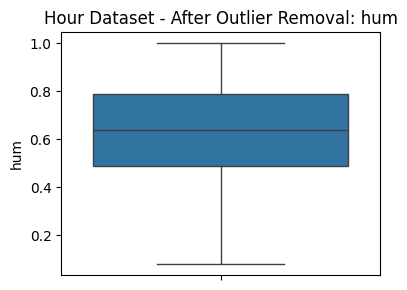

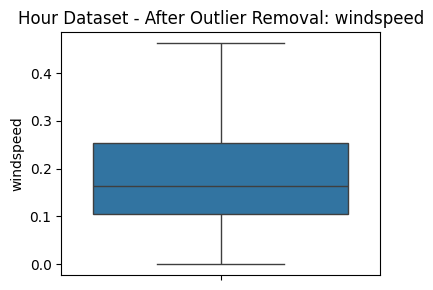

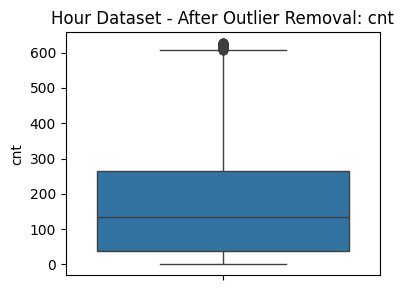

In [38]:
numeric_cols = ['temp','atemp','hum','windspeed','cnt']
numeric_hour = [c for c in numeric_cols if c in hour.columns]
def remove_outliers_hour(hour, cols):
    hour_clean = hour.copy()
    for col in cols:
        Q1 = hour_clean[col].quantile(0.25)
        Q3 = hour_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        hour_clean = hour_clean[(hour_clean[col] >= lower) & (hour_clean[col] <= upper)]
    return hour_clean
hour_clean = remove_outliers_hour(hour, numeric_hour)
for col in numeric_hour:
    plt.figure(figsize=(4,3))
    sns.boxplot(y=hour[col])
    plt.title(f"Hour Dataset - Before Removal: {col}")
    plt.tight_layout()
    plt.show()
for col in numeric_hour:
    plt.figure(figsize=(4,3))
    sns.boxplot(y=hour_clean[col])
    plt.title(f"Hour Dataset - After Outlier Removal: {col}")
    plt.tight_layout()
    plt.show()


In [23]:
day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [24]:
hour.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
X = day.drop('cnt', axis=1)
y = day['cnt']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# ---------------- RANDOM FOREST ----------------
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

print("\n===== Random Forest =====")
print("Training R² :", r2_score(y_train, rf_train_pred))
print("Testing  R² :", r2_score(y_test, rf_test_pred))
print("MAE        :", mean_absolute_error(y_test, rf_test_pred))
print("RMSE       :", np.sqrt(mean_squared_error(y_test, rf_test_pred)))

# ---------------- XGBOOST ----------------
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

print("\n===== XGBoost =====")
print("Training R² :", r2_score(y_train, xgb_train_pred))
print("Testing  R² :", r2_score(y_test, xgb_test_pred))
print("MAE        :", mean_absolute_error(y_test, xgb_test_pred))
print("RMSE       :", np.sqrt(mean_squared_error(y_test, xgb_test_pred)))
#-----decision tree-------------
dt_model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
dt_model.fit(X_train, y_train)

dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

print("\n===== Decision Tree =====")
print("Training R² :", r2_score(y_train, dt_train_pred))
print("Testing  R² :", r2_score(y_test, dt_test_pred))
print("MAE        :", mean_absolute_error(y_test, dt_test_pred))
print("RMSE       :", np.sqrt(mean_squared_error(y_test, dt_test_pred)))


===== Random Forest =====
Training R² : 0.9372098740564455
Testing  R² : 0.5695126559151307
MAE        : 1024.2930843621625
RMSE       : 1213.8740247938417

===== XGBoost =====
Training R² : 0.9985722899436951
Testing  R² : 0.5130144357681274
MAE        : 1061.767578125
RMSE       : 1291.0749397304558

===== Decision Tree =====
Training R² : 0.8830996005281196
Testing  R² : 0.3699928082507138
MAE        : 1172.3305483076033
RMSE       : 1468.4737165246445


# hyperparameter tuning

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X = day.drop('cnt', axis=1)
y = day['cnt']
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf')
param_grid = {
    'C': [1, 5, 10, 30],
    'gamma': [0.01, 0.05, 0.1],
    'epsilon': [0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    svr,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

best_svr = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

# ---------------- EVALUATION ----------------
train_pred = np.expm1(best_svr.predict(X_train_scaled))
test_pred = np.expm1(best_svr.predict(X_test_scaled))

y_train_orig = np.expm1(y_train)
y_test_orig = np.expm1(y_test)

print("\n===== Tuned SVR (RBF Neural Model) =====")
print("Training R² :", round(r2_score(y_train_orig, train_pred), 3))
print("Testing  R² :", round(r2_score(y_test_orig, test_pred), 3))
print("MAE        :", round(mean_absolute_error(y_test_orig, test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test_orig, test_pred)), 2))


Best Parameters: {'C': 5, 'epsilon': 0.2, 'gamma': 0.01}

===== Tuned SVR (RBF Neural Model) =====
Training R² : 0.664
Testing  R² : 0.606
MAE        : 1018.32
RMSE       : 1161.46


In [27]:
X = day.drop('cnt', axis=1)
y = day['cnt']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# ---------------- RANDOM FOREST ----------------
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 12, 14, 16],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=12,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)
print("\n===== Tuned Random Forest =====")
print("Training R² :", round(r2_score(y_train, rf_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, rf_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, rf_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, rf_test_pred)), 2))
# ---------------- XGBOOST ----------------
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'
)
xgb_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [4, 6],
    'learning_rate': [0.03, 0.05],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}
xgb_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
xgb_train_pred = best_xgb.predict(X_train)
xgb_test_pred = best_xgb.predict(X_test)
print("\n===== Tuned XGBoost =====")
print("Training R² :", round(r2_score(y_train, xgb_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, xgb_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, xgb_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, xgb_test_pred)), 2))
# ---------------- DECISION TREE ----------------
dt = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [6, 8, 10, 12, 14, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
dt_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
dt_search.fit(X_train, y_train)
best_dt = dt_search.best_estimator_
dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)
print("\n===== Tuned Decision Tree =====")
print("Training R² :", round(r2_score(y_train, dt_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, dt_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, dt_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, dt_test_pred)), 2))


===== Tuned Random Forest =====
Training R² : 0.9283
Testing  R² : 0.5611
MAE        : 1045.11
RMSE       : 1225.72

===== Tuned XGBoost =====
Training R² : 0.8762
Testing  R² : 0.562
MAE        : 1047.79
RMSE       : 1224.45

===== Tuned Decision Tree =====
Training R² : 0.7138
Testing  R² : 0.4962
MAE        : 1044.2
RMSE       : 1313.21


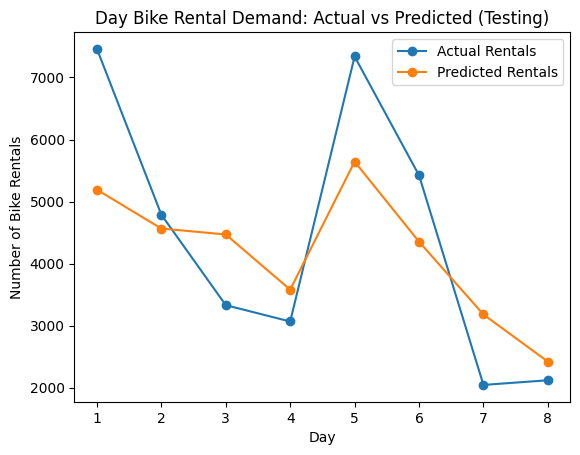

In [28]:
#randomforest
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)
X_test_8days = X_test.iloc[:8]
y_test_8days = y_test.iloc[:8]
y_pred_8days = model.predict(X_test_8days)
plt.figure()
plt.plot(range(1, 9), y_test_8days.values, marker='o', label='Actual Rentals')
plt.plot(range(1, 9), y_pred_8days, marker='o', label='Predicted Rentals')
plt.xlabel("Day")
plt.ylabel("Number of Bike Rentals")
plt.title("Day Bike Rental Demand: Actual vs Predicted (Testing)")
plt.legend()
plt.show()

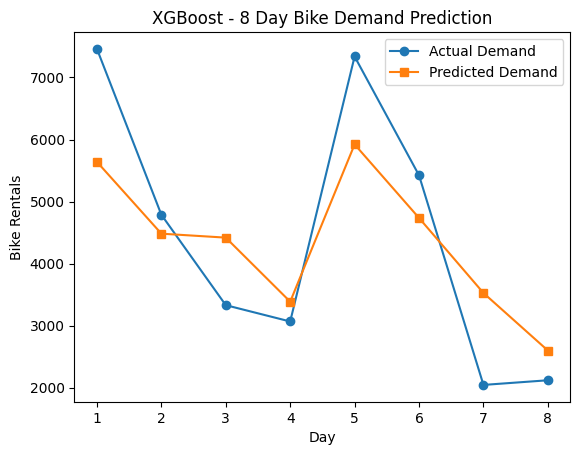

In [29]:
#xgboost
X_test_8 = X_test.iloc[:8]
y_test_8 = y_test.iloc[:8]
y_pred_8 = best_xgb.predict(X_test_8)
plt.figure()
plt.plot(range(1, 9), y_test_8, marker='o')
plt.plot(range(1, 9), y_pred_8, marker='s')
plt.xlabel("Day")
plt.ylabel("Bike Rentals")
plt.title("XGBoost - 8 Day Bike Demand Prediction")
plt.legend(["Actual Demand", "Predicted Demand"])
plt.show()


In [30]:
FEATURES = best_xgb.get_booster().feature_names
last_row = day.iloc[-1].copy()
future_predictions = []
temp_input = last_row.drop('cnt')
for i in range(1, 7):
    temp_input = temp_input.copy()
    temp_input['weekday'] = (temp_input['weekday'] + 1) % 7
    temp_input['workingday'] = 0 if temp_input['weekday'] in [0, 6] else 1
    temp_input['holiday'] = 0
    temp_input['hr'] = 12   
    input_df = pd.DataFrame([[temp_input[col] for col in FEATURES]],
                            columns=FEATURES)
    prediction = best_xgb.predict(input_df)[0]
    future_predictions.append({
        "Day": f"Day +{i}",
        "Predicted Bike Rentals": int(prediction)
    })
future_df = pd.DataFrame(future_predictions)
future_df


,Day,Predicted Bike Rentals
0,Day +1,1821
1,Day +2,1872
2,Day +3,1920
3,Day +4,1928
4,Day +5,1809
5,Day +6,1685


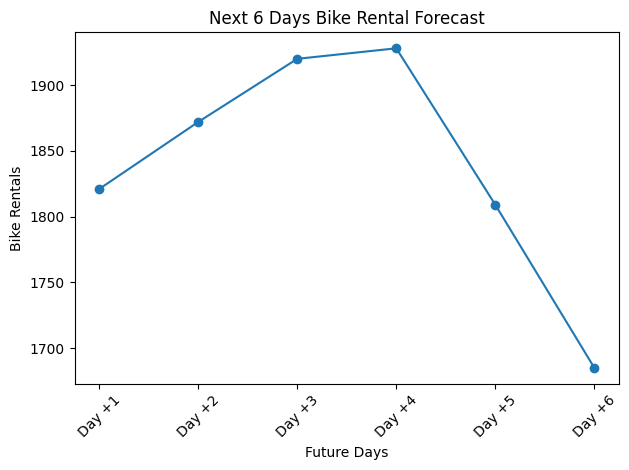

In [31]:
plt.figure()
plt.plot(future_df['Day'], future_df['Predicted Bike Rentals'], marker='o')
plt.xlabel("Future Days")
plt.ylabel("Bike Rentals")
plt.title("Next 6 Days Bike Rental Forecast")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# hour dataset model training

In [32]:
X = hour.drop('cnt', axis=1)
y = hour['cnt']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# ---------------- RANDOM FOREST ----------------
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=14,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
print("\n===== Random Forest =====")
print("Training R² :", round(r2_score(y_train, rf_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, rf_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, rf_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, rf_test_pred)), 2))
# ---------------- XGBOOST ----------------
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
print("\n===== XGBoost =====")
print("Training R² :", round(r2_score(y_train, xgb_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, xgb_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, xgb_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, xgb_test_pred)), 2))
# ---------------- DECISION TREE ----------------
dt_model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
dt_model.fit(X_train, y_train)
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
print("\n===== Decision Tree Regressor =====")
print("Training R² :", round(r2_score(y_train, dt_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, dt_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, dt_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, dt_test_pred)), 2))


===== Random Forest =====
Training R² : 0.9407
Testing  R² : 0.861
MAE        : 41.68
RMSE       : 61.57

===== XGBoost =====
Training R² : 0.9293
Testing  R² : 0.8844
MAE        : 38.66
RMSE       : 56.14

===== Decision Tree Regressor =====
Training R² : 0.8884
Testing  R² : 0.7988
MAE        : 48.49
RMSE       : 74.05


In [33]:
X = hour.drop('cnt', axis=1)
y = hour['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================= DECISION TREE (TUNED) =================
dt = DecisionTreeRegressor(random_state=42)

dt_param_grid = {
    'max_depth': [4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt']
}

dt_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

dt_search.fit(X_train, y_train)
best_dt = dt_search.best_estimator_

dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)

print("\n===== Tuned Decision Tree =====")
print("Training R² :", round(r2_score(y_train, dt_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, dt_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, dt_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, dt_test_pred)), 2))


# ================= RANDOM FOREST (TUNED) =================
rf = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'max_depth': [10, 12, 14, 16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_

rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\n===== Tuned Random Forest =====")
print("Training R² :", round(r2_score(y_train, rf_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, rf_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, rf_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, rf_test_pred)), 2))


# ================= XGBOOST (TUNED) =================
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'
)

xgb_param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 2, 3],
    'reg_alpha': [0, 0.1, 0.5, 1]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=25,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)
best_xgb = xgb_random_search.best_estimator_

xgb_train_pred = best_xgb.predict(X_train)
xgb_test_pred = best_xgb.predict(X_test)

print("\n===== Tuned XGBoost =====")
print("Training R² :", round(r2_score(y_train, xgb_train_pred), 4))
print("Testing  R² :", round(r2_score(y_test, xgb_test_pred), 4))
print("MAE        :", round(mean_absolute_error(y_test, xgb_test_pred), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, xgb_test_pred)), 2))



===== Tuned Decision Tree =====
Training R² : 0.8823
Testing  R² : 0.8181
MAE        : 46.41
RMSE       : 70.42

===== Tuned Random Forest =====
Training R² : 0.9466
Testing  R² : 0.8403
MAE        : 44.38
RMSE       : 65.99

===== Tuned XGBoost =====
Training R² : 0.9614
Testing  R² : 0.893
MAE        : 36.26
RMSE       : 54.0


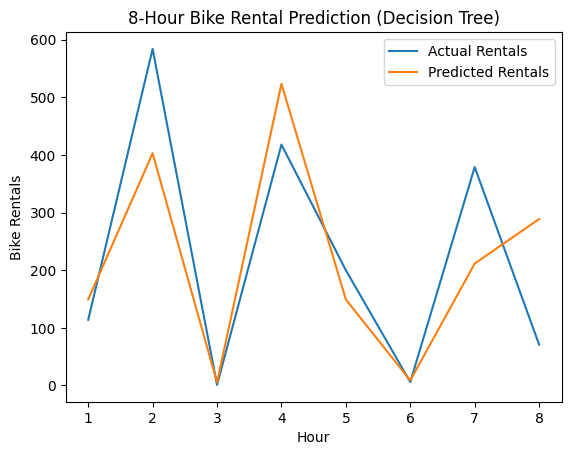

In [34]:
#decision tree
X_test_8 = X_test.iloc[:8]
y_test_8 = y_test.iloc[:8]
y_pred_dt_8 = best_dt.predict(X_test_8)
plt.figure()
plt.plot(range(1, 9), y_test_8)
plt.plot(range(1, 9), y_pred_dt_8)
plt.xlabel("Hour")
plt.ylabel("Bike Rentals")
plt.title("8-Hour Bike Rental Prediction (Decision Tree)")
plt.legend(["Actual Rentals", "Predicted Rentals"])
plt.show()

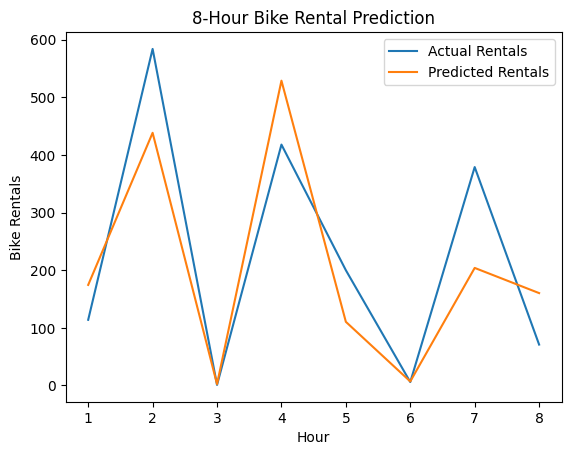

In [35]:
#xgboost
X_test_8 = X_test.iloc[:8]
y_test_8 = y_test.iloc[:8]
y_pred_8 =best_xgb.predict(X_test_8)
plt.figure()
plt.plot(range(1, 9), y_test_8)
plt.plot(range(1, 9), y_pred_8)
plt.xlabel("Hour")
plt.ylabel("Bike Rentals")
plt.title("8-Hour Bike Rental Prediction")
plt.legend(["Actual Rentals", "Predicted Rentals"])
plt.show()

In [36]:
from datetime import datetime, timedelta
hour_input = {
    'season': 2,
    'mnth': 6,
    'hr': 10,          
    'holiday': 0,
    'weekday': 2,
    'workingday': 1,
    'weathersit': 1,
    'temp': 0.6,
    'atemp': 0.58,
    'hum': 0.4,
    'windspeed': 0.2
}
print("\n=====  6 HOURS FORECAST (XGBOOST) =====")
rows = []
start_hour = int(hour_input['hr'])
base_time = datetime(2024, 1, 1, start_hour, 0)
for i in range(6):
    temp_input = hour_input.copy()

    current_time = base_time + timedelta(hours=i)
    temp_input['hr'] = current_time.hour

    input_df = pd.DataFrame([temp_input])
    pred = best_xgb.predict(input_df)[0]

    rows.append({
        "Time": current_time.strftime("%I %p"),
        "Predicted cnt": round(pred, 2)
    })
forecast_df = pd.DataFrame(rows)
forecast_df


=====  6 HOURS FORECAST (XGBOOST) =====


,Time,Predicted cnt
0,10 AM,173.520004
1,11 AM,207.380005
2,12 PM,263.760010
3,01 PM,270.140015
4,02 PM,246.600006
5,03 PM,260.480011


In [37]:
import joblib

# suppose this is your final trained model
joblib.dump(best_xgb, "bike_demand_model.pkl")

print("Model saved successfully")


Model saved successfully
